## **SGD v/s BGD**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **BATCH GRADIENT DESCENT**

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/homeprices_banglore.csv")

df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [4]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

X_scaled = sx.fit_transform(df.drop('price',axis='columns'))


In [5]:
X_scaled

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [6]:
y_scaled = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [7]:
y_scaled

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [10]:
def batch_Grad_desc(X,y_t,epochs,learning_rate=0.01):
  numOfFeat = X.shape[1]
  w = np.ones(shape = (numOfFeat))
  b=0
  tot_samp = X.shape[0]
  cost_list = []
  epoch_list = []
  for i in range(epochs):
    y_predicted = np.dot(w,X_scaled.T) + b

    w_grad = -(2/tot_samp)*(X.T.dot(y_t-y_predicted))
    b_grad = -(2/tot_samp)*np.sum(y_t-y_predicted)

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    cost = np.mean(np.square(y_t-y_predicted)) # MSE (Mean Squared Error)

    if i%10==0:
        cost_list.append(cost)
        epoch_list.append(i)

  return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_Grad_desc(X_scaled,y_scaled.reshape(y_scaled.shape[0],),500)
w, b, cost




(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

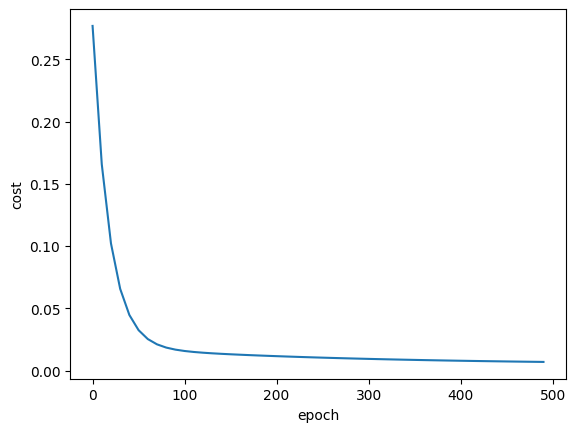

In [11]:
import matplotlib.pyplot as plt
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [12]:
def predict(area,bedrooms,w,b):
  X_scaled = sx.transform([[area, bedrooms]])[0]
  scaled_price = w[0] * X_scaled[0] + w[1] * X_scaled[1] + b

  return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

# **Stochastic Gradient Descent**

In [16]:
import random
random.randint(0,6)
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]

    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = random.randint(0,total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]

        y_predicted = np.dot(w, sample_x.T) + b

        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.square(sample_y-y_predicted)

        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(X_scaled,y_scaled.reshape(y_scaled.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.70802367, 0.67508459]), -0.2294101971023611, 0.023765473209271765)

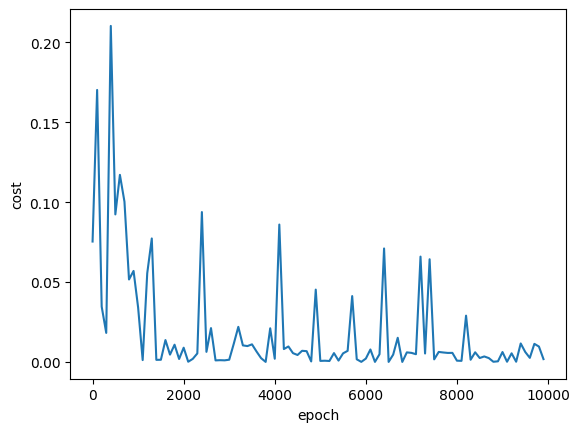

In [17]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [18]:
predict(2600,4,w_sgd, b_sgd)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.70943870820784